<a href="https://colab.research.google.com/github/rahulrajpr/AdvancedFeatureEngineering/blob/DataImputation/MultivariateImputation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np

In [4]:
path = '/content/drive/MyDrive/Udemy Courses - 2.0/Feature Engineering/Dataset/houseprice/houseprice.csv'
data = pd.read_csv(path)

In [11]:
sel_cols = ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
    'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
    'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
    '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
    'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
    'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
    'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
    'WoodDeckSF',  'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
    'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold',
    'SalePrice']

df = data[sel_cols]
X = df.drop('SalePrice', axis = 1)
y = df['SalePrice']

In [25]:
df.isnull().sum()

MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

In [5]:
from sklearn.model_selection import train_test_split

In [27]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size = 0.7, random_state = 100)

Imputation using the Knn

In [13]:
from sklearn.impute import KNNImputer

In [21]:
knn_imput = KNNImputer(n_neighbors= 5, weights = 'distance', metric = 'nan_euclidean')

In [22]:
knn_imput.fit(X_train)

KNNImputer(weights='distance')

In [17]:
knn_imput.transform(X_train)

array([[6.000e+01, 9.000e+01, 9.900e+03, ..., 0.000e+00, 4.000e+00,
        2.009e+03],
       [5.000e+01, 5.200e+01, 8.741e+03, ..., 0.000e+00, 4.000e+00,
        2.010e+03],
       [5.000e+01, 5.900e+01, 5.310e+03, ..., 0.000e+00, 6.000e+00,
        2.006e+03],
       ...,
       [1.200e+02, 6.800e+01, 7.820e+03, ..., 0.000e+00, 1.200e+01,
        2.007e+03],
       [5.000e+01, 6.000e+01, 1.044e+04, ..., 0.000e+00, 5.000e+00,
        2.009e+03],
       [6.000e+01, 9.200e+01, 9.920e+03, ..., 0.000e+00, 6.000e+00,
        2.007e+03]])

In [28]:
X_train_trans = pd.DataFrame(data = knn_imput.transform(X_train), columns = X_train.columns)
X_test_trans = pd.DataFrame(data = knn_imput.transform(X_test), columns = X_test.columns)

In [29]:
X_train_trans.isnull().sum()

MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
dtype: int64

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

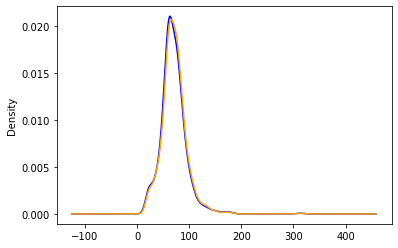

In [49]:
X_train['LotFrontage'].plot(kind = 'kde', color = 'blue')
X_train_trans['LotFrontage'].plot(kind = 'kde', color = 'orange')
plt.show()

Finding the  best parameters for the KNN using the grid search CV

In [50]:
from sklearn.model_selection import GridSearchCV

In [51]:
imputer = KNNImputer()

In [53]:
params = { 'n_neighbors' : [5,10,20],
          'weights' :['distance','uniform']}

In [56]:
gridsearch = GridSearchCV(estimator = imputer, param_grid = params, n_jobs = -1, scoring = 'accuracy')

In [57]:
gridsearch.fit(X_train)

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_search.py:969: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan]
  warnings.warn(


GridSearchCV(estimator=KNNImputer(), n_jobs=-1,
             param_grid={'n_neighbors': [5, 10, 20],
                         'weights': ['distance', 'uniform']},
             scoring='accuracy')

In [58]:
gridsearch.best_params_

{'n_neighbors': 5, 'weights': 'distance'}

In [61]:
gridsearch.best_estimator_

KNNImputer(weights='distance')

In [64]:
X_train_trans2 = pd.DataFrame(data = gridsearch.best_estimator_.transform(X_train), columns = X_train.columns)
X_test_trans2 = pd.DataFrame(data = gridsearch.best_estimator_.transform(X_test), columns = X_test.columns)

In [66]:
X_train_trans2.isnull().sum()

MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
dtype: int64

### Imputation using MICE - Multi Variate Imputation of Chain Equations

In [69]:
path = '/content/drive/MyDrive/Udemy Courses - 2.0/Feature Engineering/Dataset/creditapproval.csv'
credit = pd.read_csv(path)

In [70]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      678 non-null    object 
 1   A2      678 non-null    float64
 2   A3      690 non-null    float64
 3   A4      684 non-null    object 
 4   A5      684 non-null    object 
 5   A6      681 non-null    object 
 6   A7      681 non-null    object 
 7   A8      690 non-null    float64
 8   A9      690 non-null    object 
 9   A10     690 non-null    object 
 10  A11     690 non-null    int64  
 11  A12     690 non-null    object 
 12  A13     690 non-null    object 
 13  A14     677 non-null    float64
 14  A15     690 non-null    int64  
 15  class   690 non-null    object 
dtypes: float64(4), int64(2), object(10)
memory usage: 86.4+ KB


In [86]:
sel_cols = ['A2','A3','A8', 'A11', 'A14', 'A15','class']

In [87]:
df = credit[sel_cols]

In [88]:
df.isnull().sum()

A2       12
A3        0
A8        0
A11       0
A14      13
A15       0
class     0
dtype: int64

In [89]:
X = df.drop('class', axis = 1)
y = df['class']

In [90]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size = 0.7, random_state = 100)

In [81]:
from sklearn.linear_model import Lasso

In [80]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [83]:
mice = IterativeImputer(estimator = Lasso(),
                        max_iter= 10,
                        initial_strategy = 'mean',
                        imputation_order = 'ascending',
                        skip_complete = True,
                        random_state = 100)

In [91]:
mice.fit(X_train)

IterativeImputer(estimator=Lasso(), random_state=100, skip_complete=True)

In [94]:
X_train = pd.DataFrame(data = mice.transform(X_train), columns = X_train.columns)
X_test = pd.DataFrame(data = mice.transform(X_test), columns = X_test.columns)

In [95]:
X_train.isnull().sum()

A2     0
A3     0
A8     0
A11    0
A14    0
A15    0
dtype: int64